# Problem Statement

https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/

https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows:
***

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

# Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset loading & Dataset preprocessing-I

In [2]:
data = pd.read_csv('Company_Data.csv')

data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# shape of the data

data.shape

(400, 11)

In [4]:
# checking missing values in the data

data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
# Dropping features which will not helfull to decide 

dataset = data.drop(['CompPrice'], axis=1)

In [7]:
dataset.head()

,Sales,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,64,3,340,128,Bad,38,13,Yes,No


# Step 3: EDA

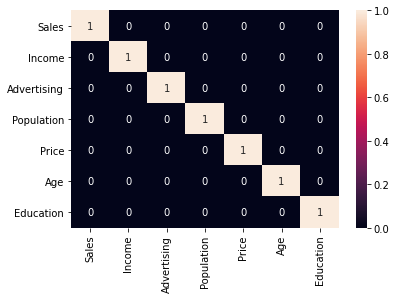

In [8]:
sns.heatmap(dataset.corr()>0.6, annot=True)
plt.show()

summary: There is no high correlation any: i) dependent to indepdent & ii) independent to independent variables

# Step 4: Data preprocessing part-II

In [9]:
# seperating independent & dependent variables

x = dataset.drop(['Sales'], axis = 1)

In [10]:
x = pd.get_dummies(x, drop_first=True)

In [11]:
x.head()

,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,73,11,276,120,42,17,0,0,1,1
1,48,16,260,83,65,10,1,0,1,1
2,35,10,269,80,59,12,0,1,1,1
3,100,4,466,97,55,14,0,1,1,1
4,64,3,340,128,38,13,0,0,1,0


In [12]:
y = pd.DataFrame(dataset['Sales'])
y.head()

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15


 ### Since y is in continous datatype.. we need toconvert it into categorical datatype to build decision tree classifier model. 

       count      mean       std  min   25%   50%   75%    max
Sales  400.0  7.496325  2.824115  0.0  5.39  7.49  9.32  16.27


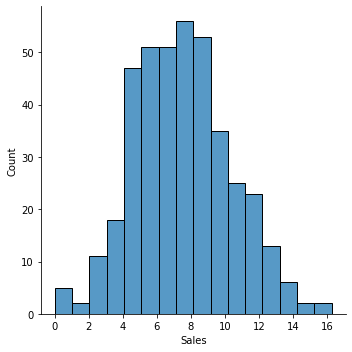

In [13]:
print(y.describe().transpose())

sns.displot(data = y.Sales)
plt.show()

So it is better to select Sales uniot above 8. So that we can get higher contributer to the highest sales unit.

In [14]:
for i in y.Sales:
    if i>8:
        y['Sales'] = y['Sales'].replace(i,'yes')
    else:
        y['Sales'] = y['Sales'].replace(i,'no')

In [15]:
y.head()

,Sales
0,yes
1,yes
2,yes
3,no
4,no


In [16]:
# Splitting data into train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify =y, random_state = 101)

In [17]:
# data balancing using stratify in train_test split..cross checking

y_train.value_counts(normalize=True)

Sales
no       0.590625
yes      0.409375
dtype: float64

In [18]:
# data balancing using stratify in train_test split..cross checking

y_test.value_counts(normalize=True)

Sales
no       0.5875
yes      0.4125
dtype: float64

In [19]:
# feature scaling
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

# Step 5: Fitting a Decision-Tree algorithm to the Training set

 ### Decision Tree Algorithms
 ***

 # 1. ID3

Metrics in ID3.

* the ID3 algorithm selects the best feature at each step while building a Decision tree.

* Before you ask, the answer to the question: ‘How does ID3 select the best feature?’ is that ID3 uses Information Gain or just Gain to find the best feature.

* Information Gain calculates the reduction in the entropy and measures how well a given feature separates or classifies the target classes. The feature with the highest Information Gain is selected as the best one.

* In simple words, Entropy is the measure of disorder and the Entropy of a dataset is the measure of disorder in the target feature of the dataset.

* In the case of binary classification (where the target column has only two types of classes) entropy is 0 if all values in the target column are homogenous(similar) and will be 1 if the target column has equal number values for both the classes.

We denote our dataset as S, entropy is calculated as:

 #### Entropy(S) = - ∑ pᵢ * log₂(pᵢ) ; i = 1 to n


where,

n is the total number of classes in the target column (in our case n = 2 i.e YES and NO)

pᵢ is the probability of class ‘i’ or the ratio of “number of rows with class i in the target column” to the “total number of rows” in the dataset.


 #### ID3 Steps:
 ***
 
* Calculate the Information Gain of each feature.


* Considering that all rows don’t belong to the same class, split the dataset S into subsets using the feature for which the Information Gain is maximum.


* Make a decision tree node using the feature with the maximum Information gain.


* If all rows belong to the same class, make the current node as a leaf node with the class as its label.


* Repeat for the remaining features until we run out of all features, or the decision tree has all leaf nodes.

In [20]:
#Fitting Decision Tree classifier to the training set  

# crieterian ='entropy' for ID3 method

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state= 10)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [21]:
classifier.score(x_train, y_train)

1.0

In [22]:
classifier.score(x_test, y_test)

0.75

In [23]:
classifier.feature_importances_

array([0.09883801, 0.14292806, 0.09841983, 0.2579313 , 0.13183165,
       0.09534558, 0.12185183, 0.04424243, 0.        , 0.00861131])

In [24]:
classifier.predict(x_test)

array(['no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no'], dtype=object)

In [25]:
classifier.predict_proba(x_test) #first column is for 'no', & second is for 'yes'

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
y_pred

array(['no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no'], dtype=object)

In [28]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[38,  9],
       [11, 22]], dtype=int64)

### Hyperparameter tuning

 #### Changing max_depth to improve model accuracy

In [99]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 10)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [100]:
frame = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})

In [101]:
frame

,max_depth,train_acc,test_acc
0,1,0.715625,0.6750
1,2,0.728125,0.6875
2,3,0.778125,0.8125
3,4,0.831250,0.8125
4,5,0.859375,0.7875
5,6,0.890625,0.7375
6,7,0.915625,0.7875
7,8,0.950000,0.7750
8,9,0.971875,0.7625
9,10,0.975000,0.7625


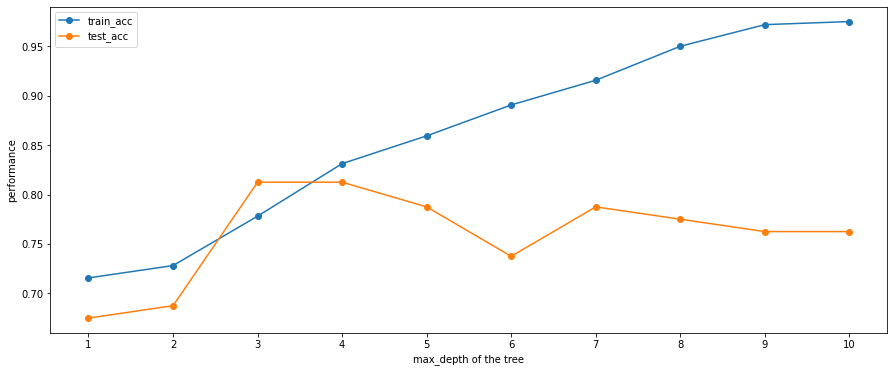

In [102]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plt.plot(frame['max_depth'], frame['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

 #### We can observe that for max_depth is equal to 4 the train & test accuracies are closer together.

### Model Building

In [108]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [109]:
classifier.score(x_train, y_train)

0.83125

In [110]:
classifier.score(x_test, y_test)

0.8125

In [36]:
y_pred = classifier.predict(x_test)

### Tree plot

In [82]:
!pip install graphviz

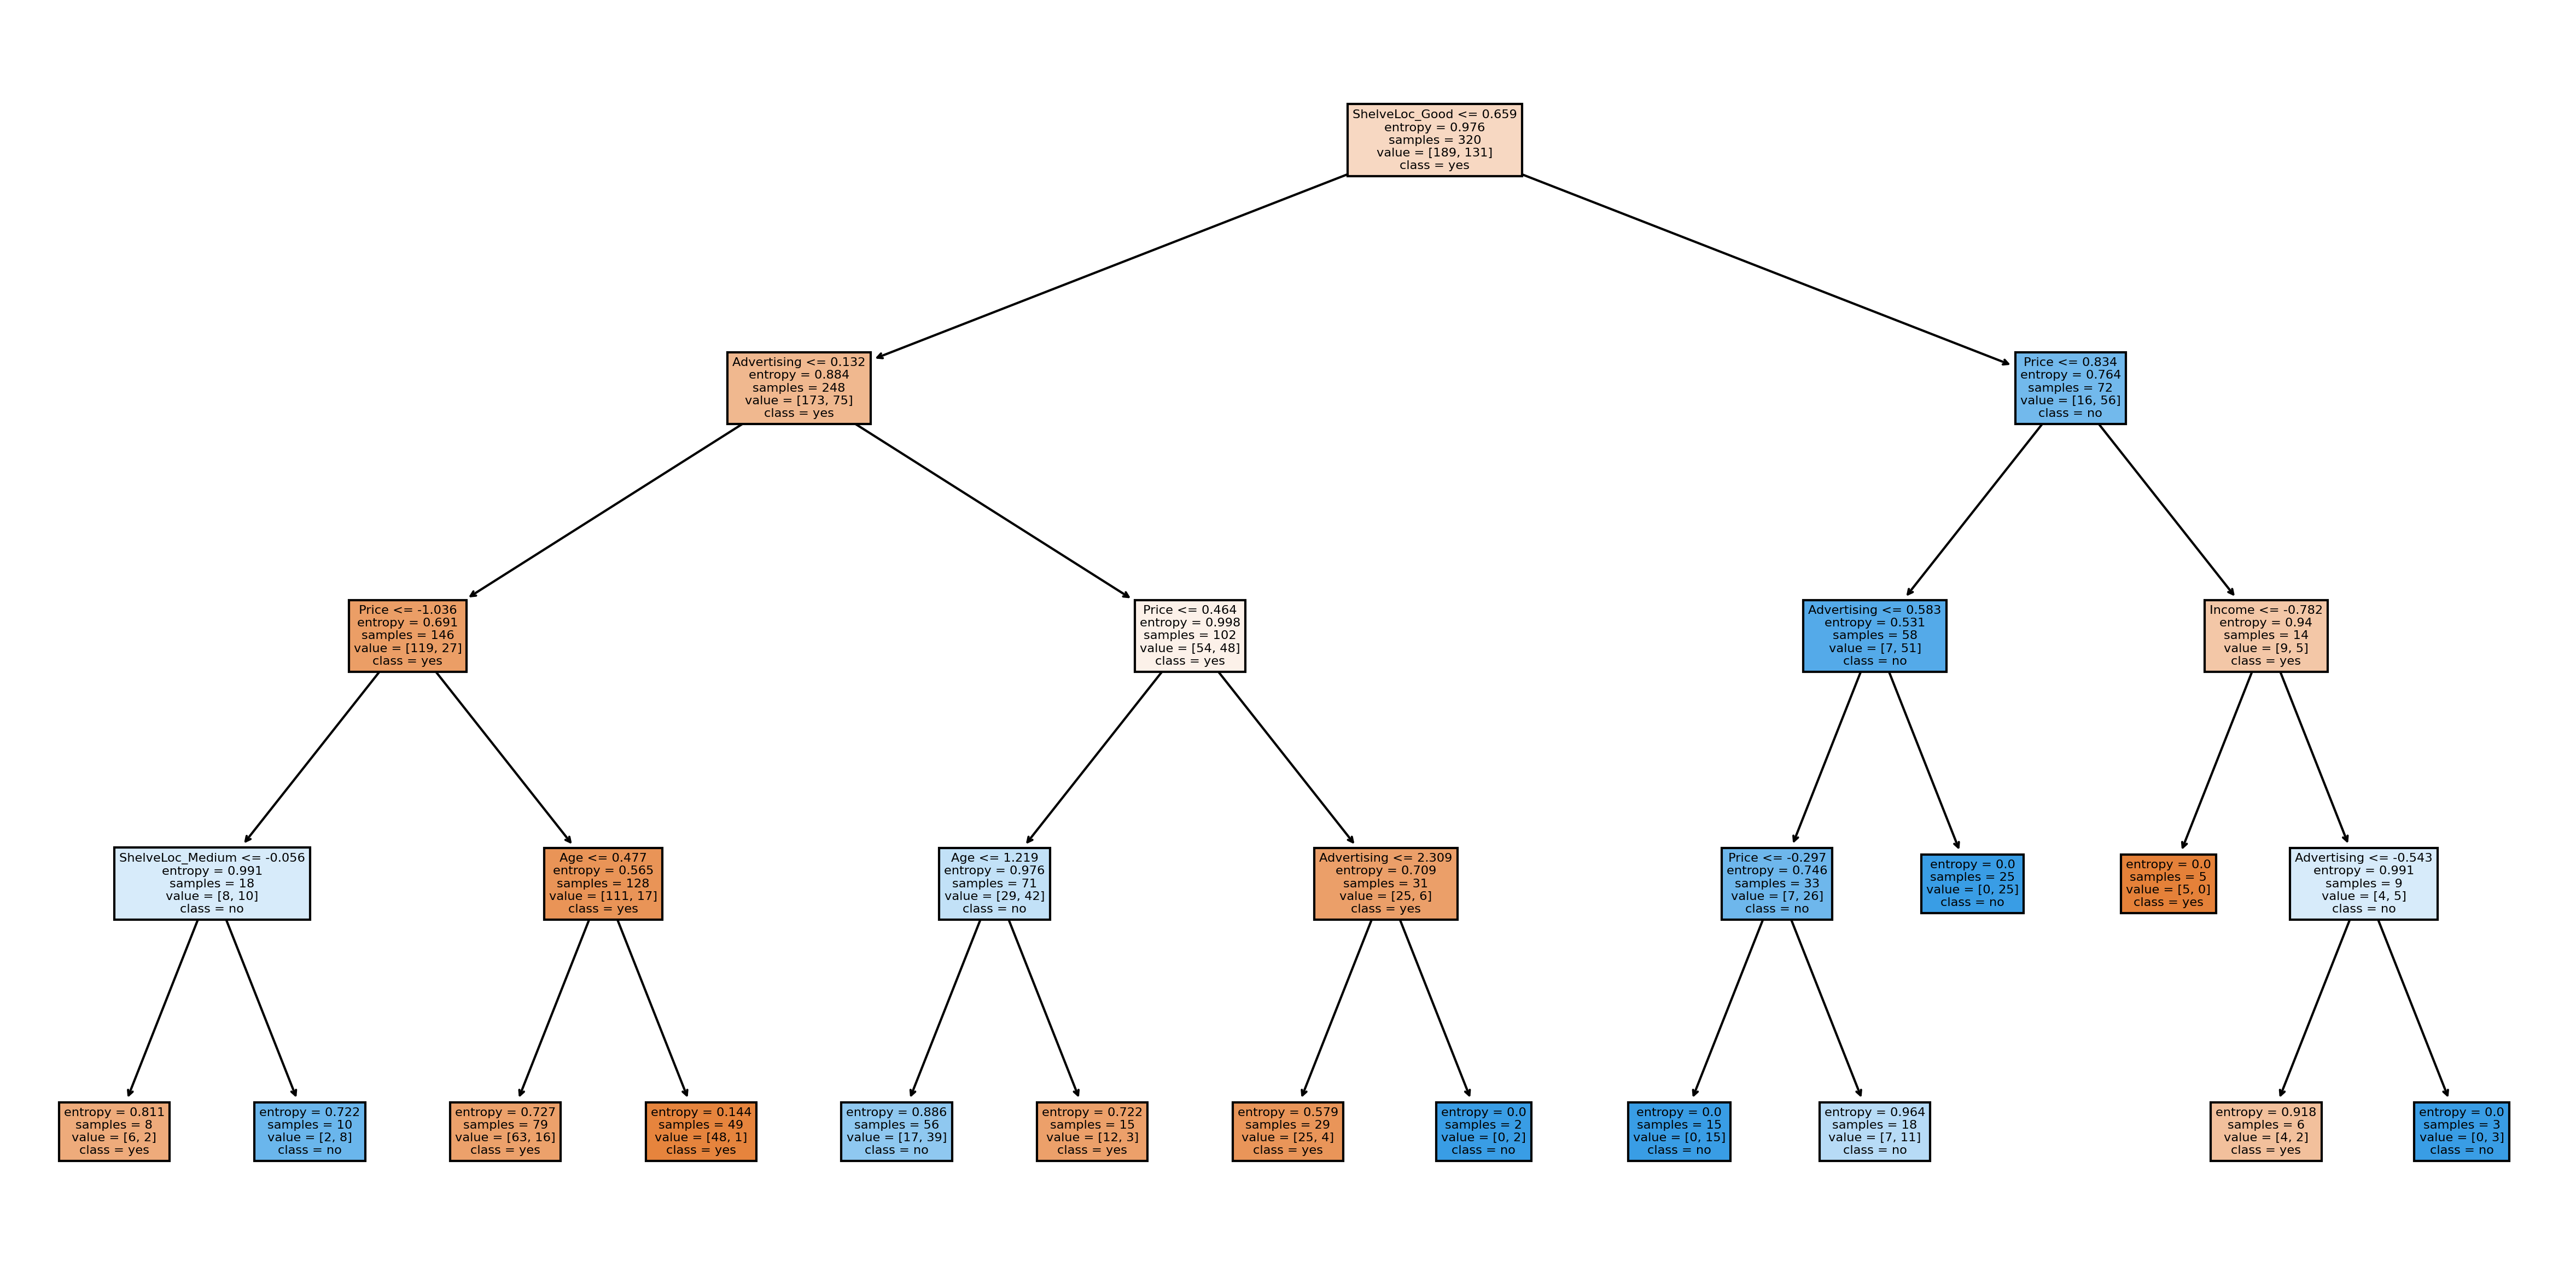

In [96]:
import graphviz 
from sklearn import tree

features = list(x.columns)
classes = list(y.Sales.unique())

fig, axex = plt.subplots(nrows=1, ncols=1,figsize=(20,10), dpi=300)
tree.plot_tree(classifier,feature_names= features, class_names=classes, filled=True)
plt.show()
 

In [90]:
from sklearn.tree import export_text
r = export_text(classifier, feature_names=features)
print(r)

|--- ShelveLoc_Good <= 0.66
|   |--- Advertising <= 0.13
|   |   |--- Price <= -1.04
|   |   |   |--- ShelveLoc_Medium <= -0.06
|   |   |   |   |--- class: no
|   |   |   |--- ShelveLoc_Medium >  -0.06
|   |   |   |   |--- class: yes
|   |   |--- Price >  -1.04
|   |   |   |--- Age <= 0.48
|   |   |   |   |--- class: no
|   |   |   |--- Age >  0.48
|   |   |   |   |--- class: no
|   |--- Advertising >  0.13
|   |   |--- Price <= 0.46
|   |   |   |--- Age <= 1.22
|   |   |   |   |--- class: yes
|   |   |   |--- Age >  1.22
|   |   |   |   |--- class: no
|   |   |--- Price >  0.46
|   |   |   |--- Advertising <= 2.31
|   |   |   |   |--- class: no
|   |   |   |--- Advertising >  2.31
|   |   |   |   |--- class: yes
|--- ShelveLoc_Good >  0.66
|   |--- Price <= 0.83
|   |   |--- Advertising <= 0.58
|   |   |   |--- Price <= -0.30
|   |   |   |   |--- class: yes
|   |   |   |--- Price >  -0.30
|   |   |   |   |--- class: yes
|   |   |--- Advertising >  0.58
|   |   |   |--- class: yes
|   

### Model Evalution

In [79]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[40,  7],
       [ 8, 25]], dtype=int64)

In [80]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.83      0.85      0.84        47
         yes       0.78      0.76      0.77        33

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.81        80
weighted avg       0.81      0.81      0.81        80



### Cross validation..

In [40]:
from sklearn.model_selection import cross_val_score
for cv in range(2,10):
    print('for cv=',cv)
    print(np.mean(cross_val_score(classifier, x, y, cv=cv)))
    print('-'*10)

for cv= 2
0.6775
----------
for cv= 3
0.7199902741929449
----------
for cv= 4
0.6950000000000001
----------
for cv= 5
0.6775
----------
for cv= 6
0.6973842906678728
----------
for cv= 7
0.6846426410854722
----------
for cv= 8
0.695
----------
for cv= 9
0.709652076318743
----------


 ### So final best accuracy for this model is 0.72 with cv=3

In [41]:
feature_importance = pd.DataFrame({'features':x.columns,'feature_imp':classifier.feature_importances_})

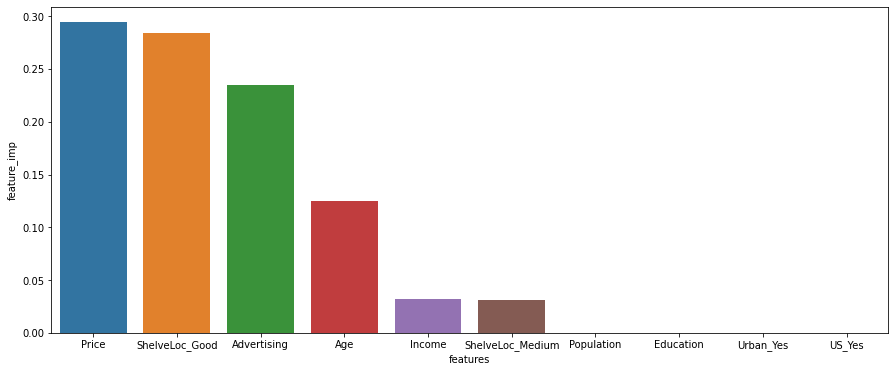

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x='features', y='feature_imp',\
            data = feature_importance.sort_values(by='feature_imp', ascending=False))
plt.show()